# Equações Diferenciais Ordinárias



## Método de Euler



### Crescimento Populacional

Suponha que em uma determinada região, a quantidade de pessoas $P(t)$ no instante $t=0$ seja de 1.000 indivíduos, isto é $P(0) = 1000$ e sua taxa de variação seja de $3\%$ da população atual por ano, ou seja $P'(t) = 0,03.P(t)$ Com base nestes dados, faça um gráfico da evolução temporal da população de $t=0$ até $t=20$ e estime a população no ano $t=20$. Considere $h=0,1$

,t,p
200,20.0,1820.482901


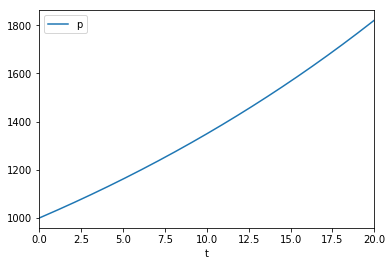

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pL = lambda t,p : 0.03*p
euler = lambda t,p,dt : [t+dt, p+pL(t,p)*dt]

def edo_euler(t, p, dt, tf):
  sol = [[t,p]]
  while t<=tf:
    t,p = euler(t, p, dt)
    sol.append([t,p])
  sol = pd.DataFrame(data = sol, columns=['t','p'])
  return(sol)

ft = edo_euler(t=0, p=1000, dt=0.1, tf=20)
graf = ft.plot(x='t',y='p') 
ft[ (ft['t']-20).abs() < 1e-05]

A resolução numérica de equações diferenciais fornece valores para a função solução, calculando a mesma ponto a ponto, a partir da expressão da derivada e de um valor inicial qualquer. O método numérico mais simples é o Método de Euler, o qual calcula o valor da função solução em $t+\Delta t$ através da expressão $f(t+\Delta t) \approx f(t) + f'(t)\Delta t$. O valor escolhido para $\Delta t$ chama-se *passo* da solução. 



### Crescimento Populacional Logístico. 

O modelo no qual $P'(t) = 0,03P(t)$ tem uma deficiência pois a população pode crescer sem limite, o que não ocorre na prática. Se o valor de $P(0)$ for pequeno (menor que 10x) um valor liminte $M$, as funções de crescimento populacional primeiro apresentam um crescimento similar ao exponencial. A medida que o tempo passa e o valor de $P(t)$ se aproxima de $M$, a função passa a crescer cada vez menos, tendendo para zero, isto é para a estabilidade. 



Um modelo para $P(t)$ e $P'(t)$ que pode descrever tal situação é $P' = a.P.(M-P)$. A função $P(t)$ solução para este problema é $P(t) = \frac{M}{1+k.e^{-aMt}}$, onde $k = \frac{M-P(0)}{P(0)}$. Na figura a seguir podem ser vistos os gráficos de $P(t)$ obtidos através do método de Euler e da função de solução exata, para $M=10.000$, $P(0)=100$, $a=5.{10}^{-6}$ e $t = [0,200]$

O desenvolvimento da solução algébrica é apresentado a seguir:

$$ \frac{dP}{dt} = a(M-P)P \boldsymbol{\rightarrow} \frac{dP}{(M-P)P} = adt \boldsymbol{\rightarrow} \left[ \frac{1}{M(M-P)}+\frac{1}{MP} \right] dp = adt$$
$$ $$
$$\int_{}^{} \frac{dp}{(M-P)} + \int_{}^{} \frac{dp}{P}  = \int_{}^{} aMdt \boldsymbol{\rightarrow} -ln(M-P) + ln(P) = aMt + C$$
$$ $$
$$ ln \left( \frac{P}{M-P} \right) = aMt + C \boldsymbol{\rightarrow} \frac{P}{M-P} = e^{aMt+C} \boldsymbol{\rightarrow} P = \frac{M}{1+Ce^{-aMt}}$$
$$ $$

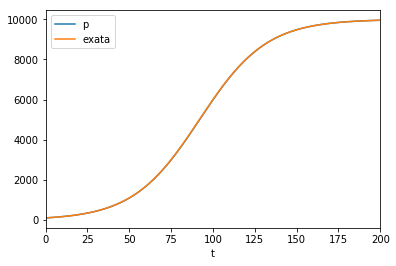

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

a = 5e-06; M = 10000; p0 = 100 
pL = lambda t,p : a*(M-p)*p
euler = lambda t,p,dt : [t+dt, p+pL(t,p)*dt]
exata = lambda t : M / (1 + (M-p0)/p0 * np.exp(-a*M*t))

def edo_euler(t, p, dt, tf):
  sol = [[t,p]]
  while t<=tf:
    t,p = euler(t, p, dt)
    sol.append([t,p])
  sol = pd.DataFrame(data = sol, columns=['t','p'])
  return(sol)

ft = edo_euler(t=0, p=100, dt=0.1, tf=200)
ft['exata'] = list(map(exata,ft['t']))
graf = ft.plot(x='t',y=['p','exata']) 

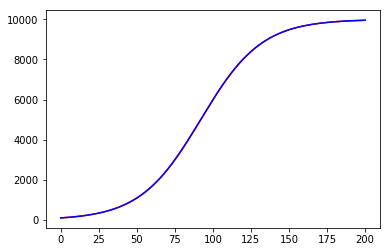

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def fLinha(t,ft):
  M = 10000; a = 5e-06
  fLt = a*ft*(M-ft)
  return(fLt)

def euler(t,ft,dt):
  ft = ft + dt*fLinha(t,ft)
  t = t + dt
  return([t,ft])

def edo(ti,tf,fti,dt=0.1, metodo=euler, grafico=False, precisao=3):
  ft = [[ti,fti]]
  while ft[-1][0]<=tf:
    ft.append(metodo(ft[-1][0],ft[-1][1],dt))
  ft = pd.DataFrame(data = ft, columns = ['t','f(t)'])

  if grafico:
    plt.close("all")
    graf = plt.plot(ft.iloc[:,0],ft.iloc[:,1])
    plt.show()

  return(ft)

def logistica(t):
  M = 10000
  a = 5e-06
  f0 = 100
  k = (10_000 - f0)/f0
  f = M/(1+k*np.exp(-a*M*t))
  return(f)

ft_euler = edo(ti=0, tf=200, fti=100, dt=0.1, metodo=euler, grafico=False) 
ft_exata = list(map(logistica, ft_euler.iloc[:,0].values))

plt.close("all")
graf1 = plt.plot(ft_euler.iloc[:,0],ft_euler.iloc[:,1],'r')
graf2 = plt.plot(ft_euler.iloc[:,0],ft_exata,'b')
plt.show()

### Sensibilidade do Método de Euler ao tamanho do passo $\Delta t$. 

Para a utilização eficaz do método de Euler é necessário um compromisso entre o erro decorrente do número de operações (a qual impõe um limite em quão pequeno poderá ser o valor de $\Delta t$) e a estabilidade do processo de cálculo (a qual impõe um limite em quão grande poderá ser o valor de $\Delta t$).



No gráfico a seguir é apresentada a solução da a equação logística para um valor de $\Delta t$ igual a 50 e um intervalo de solução $ t = [0,500]$.Observe que a solução além de oscilar torna-se divergente. Esta oscilação ocorre devido à distância $\Delta t$ que está sendo utilizada em cada iteração. 



A partir de um certo valor tudo se passa como se de um instante para o outro a população tivesse ultrapassado o valor limite, portanto a derivada torna-se negativa. Porém como o passo é muito longo a função torna-se muito pequena, necessitando de outro ajuste radical de valor. 



Este processo pode ou não ser corrigido ao longo do tempo. Se o passo for menor que um valor limite, a oscilação é lentamente eliminada, porém se o passo for suficientemente grande a diferença ao invés de ser eliminada é ampliada a cada iteração (o que torna a solução numérica divergente).

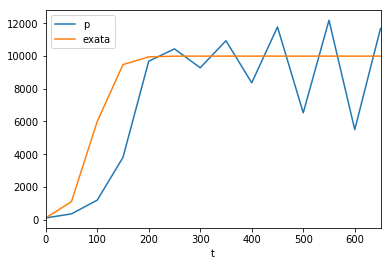

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

a = 5e-06; M = 10000; p0 = 100 
pL = lambda t,p : a*(M-p)*p
euler = lambda t,p,dt : [t+dt, p+pL(t,p)*dt]
exata = lambda t : M / (1 + (M-p0)/p0 * np.exp(-a*M*t))

def edo_euler(t, p, dt, tf):
  sol = [[t,p]]
  while t<=tf:
    t,p = euler(t, p, dt)
    sol.append([t,p])
  sol = pd.DataFrame(data = sol, columns=['t','p'])
  return(sol)

ft = edo_euler(t=0, p=100, dt=50, tf=600)
ft['exata'] = list(map(exata,ft['t']))
graf = ft.plot(x='t',y=['p','exata']) 

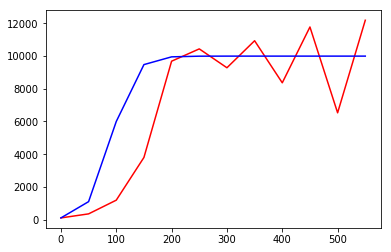

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def fLinha(t,ft):
  M = 10000; a = 5e-06
  fLt = a*ft*(M-ft)
  return(fLt)

def euler(t,ft,dt):
  ft = ft + dt*fLinha(t,ft)
  t = t + dt
  return([t,ft])

def edo(ti,tf,fti,dt=0.1, metodo=euler, grafico=False, precisao=3):
  ft = [[ti,fti]]
  while ft[-1][0]<=tf:
    ft.append(metodo(ft[-1][0],ft[-1][1],dt))
  ft = pd.DataFrame(data = ft, columns = ['t','f(t)'])

  if grafico:
    plt.close("all")
    graf = plt.plot(ft.iloc[:,0],ft.iloc[:,1])
    plt.show()

  return(ft)

def logistica(t):
  M = 10000
  a = 5e-06
  f0 = 100
  k = (10_000 - f0)/f0
  f = M/(1+k*np.exp(-a*M*t))
  return(f)

ft_euler = edo(ti=0, tf=500, fti=100, dt=50, metodo=euler, grafico=False) 
ft_exata = list(map(logistica, ft_euler.iloc[:,0].values))

plt.close("all")
graf1 = plt.plot(ft_euler.iloc[:,0],ft_euler.iloc[:,1],'r')
graf2 = plt.plot(ft_euler.iloc[:,0],ft_exata,'b')
plt.show()

### Oscilação de Um Sistema Massa-Mola. 

Neste problema vamos traçar o gráfico da coordenada $x$ do centro de massa do objeto suspenso pela mola ao longo do tempo, considerando os seguintes parâmetros: constante dinâmica $\mu=0,28$, constante elástica $k=0,1$, massa $m=6kg$, deslocamento inicial $x_0=5m$, velocidade inicial $v_0=-10m/s$ e $\Delta t = 0,05$. Tal sistema é regido pela equação diferencial:



$$ m\frac{d^2 x}{d t^2}  =  -kx-\mu\frac{dx}{dt}$$
$$                x(0)  =  x_0$$
$$               x'(0)  =  v_0$$



Para resolver este problema de forma numérica, transformamos a equação diferencial ordinária linear de segunda ordem acima em um sistema de equações diferenciais ordinárias lineares de primeira ordem fazendo:




$$ v' = -\frac{k}{m} x - \frac{\mu}{m} v$$
$$ x' = v$$

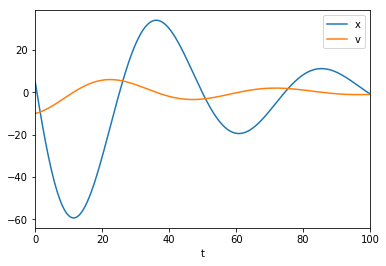

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

vL = lambda t,x,v : -(0.1*x+0.28*v)/6
xL = lambda t,x,v : v

t, x, v = 0, 5, -10
tf, dt = 100, 0.1
sol = []

while t<tf:
  sol.append([t,x,v])
  t, x, v = t + dt, x + xL(t,x,v,)*dt, v + vL(t,x,v)*dt
sol = pd.DataFrame(data = sol, columns = ['t','x','v'])

graf = sol.plot(x='t',y=['x','v'])


### Solução numérica quando $\mu=0$



Fazendo $m=6$ e $\mu=0$ (o que equivale a tornar o amortecimento nulo) obtemos a solução abaixo. Como pode ser visto o gráfico resultante da posição ao longo do tempo tem amplitude crescente, o que significa que o sistema estaria ganhando energia, o que claramente não é o caso.

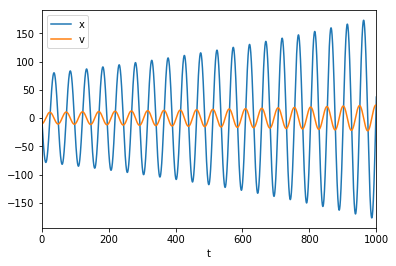

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

vL = lambda t,x,v : -(0.1*x+0.0*v)/6
xL = lambda t,x,v : v

t, x, v = 0, 5, -10
tf, dt = 1000, 0.1
sol = []

while t<tf:
  sol.append([t,x,v])
  t, x, v = t + dt, x + xL(t,x,v,)*dt, v + vL(t,x,v)*dt
sol = pd.DataFrame(data = sol, columns = ['t','x','v'])

graf = sol.plot(x='t',y=['x','v'])

O que ocorre neste caso é que o método de Euler produz resultados a príncipio com um pequeno erro. No entanto a natureza recursiva do método (lembre-se que para calcular o valor em $f(t=3)$ devemos calcular antes o valor em $f(t=3-\Delta t)$ e assim sucessivamente) leva a um acúmulo dos erros. A primeira vista, a solução seria utilizar um valor bem menor para o passo $\Delta t$, pois isto iria diminuir o erro em cada cálculo. No entanto esta abordagem tem dois incovenientes : 1$^o$) ela aumenta a quantidade de operações necessárias, o que aumenta o tempo e a potência de processamento necessária e 2$^o$) ao aumentar a quantidade de operações necessárias, entra em cena o erro de arredondamento inerente às operações feitas em um computador.



## Método de Runge-Kutta de $4^{a}$ Ordem

### Crescimento Populacional Logístico

Nos exemplos anteriores foi mostrado que o método de Euler possui limitações relativas ao tamanho de passo e a precisão da solução obtida com o mesmo. Para minimizar tais problemas, existe o Método de Runge-Kutta de 4$^a$ ordem, o qual recebe este nome em homenagem aos matemáticos alemães que o desenvolveram no início do século XX. Nele o valor de $f(t+\Delta t)$ é calculado a partir do seguinte conjunto de operações :
$$ $$
$$y'=f(t,y)$$
$$ $$
$$k_1=f(t,y)$$
$$ $$
$$k_2=f\left(t+ \frac{\Delta t}{2} \quad ; \quad y+k_1.\frac{\Delta t}{2} \right)$$
$$ $$
$$k_3=f\left(t+ \frac{\Delta t}{2} \quad ; \quad y+k_2.\frac{\Delta t}{2} \right)$$
$$ $$
$$k_4=f\left(t+ \Delta t \quad ; \quad y+k_3.\Delta t \right)$$
$$ $$
$$y(t+\Delta t)=y(t)+\frac{k_1+2k_2+2k_3+k_4}{6}$$
$$ $$


A seguir, para um passo de solução $\Delta t = 50$ são apresentados três curvas de solução: exata, Runge-Kutta e Euler. Observe que apesar de apresentar um erro razoável na parte intermediária, o método de Runge-Kutta ainda assim converge para o valor limite correto, enquanto o método de Euler diverge.

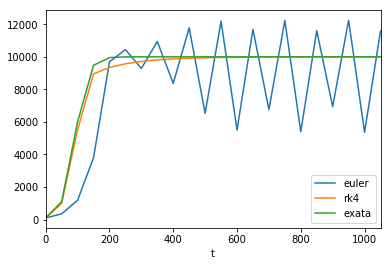

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

a = 5e-06; M = 10000; p0 = 100 
pL = lambda t,p : a*(M-p)*p
euler = lambda t,p,dt : [t+dt, p+pL(t,p)*dt]
exata = lambda t : M / (1 + (M-p0)/p0 * np.exp(-a*M*t))

def rk4(t,p,dt):
  k1 = pL(t,p)
  k2 = pL(t+dt/2, p+k1*dt/2)
  k3 = pL(t+dt/2, p+k2*dt/2)
  k4 = pL(t+dt, p+k3*dt)
  p = p + dt/6*(k1+2*k2+2*k3+k4)
  t = t+ dt
  return([t,p])

def edo(t, p, dt, tf, metodo):
  sol = [[t,p]]
  while t<=tf:
    t,p = metodo(t, p, dt)
    sol.append([t,p])
  sol = pd.DataFrame(data = sol, columns=['t','p'])
  return(sol)

ft = edo(t=0, p=100, dt=50, tf=1000, metodo=euler)
ft.rename(columns = {'p':'euler'},inplace=True)
ft_rk4 = edo(t=0, p=100, dt=50, tf=1000, metodo=rk4)
ft['rk4'] = ft_rk4['p'] 
ft['exata'] = list(map(exata,ft['t']))
graf = ft.plot(x='t',y=['euler','rk4','exata']) 

### Sistema Massa-Mola: Solução quando $\mu=0$

Vamos agora analisar o caso do sistema massa mola quando $\mu=0$, utilizando para resolução o método de Runge Kutta de ${4}^{a}$ ordem. Primeiro adaptamos o método a um sistema de duas equações diferenciais ordinárias da seguinte forma:

$$
  \begin{split}
  v' &= f(t, x \quad , \quad v) \\
  k_1 &= f(t, x \quad , \quad v) \\
  k_2 &= f \left(t+\frac{\Delta t}{2} \quad , \quad x+k_1 \frac{\Delta t}{2} \quad , \quad v+l_1 \frac{\Delta t}{2} \right) \\
  k_3 &= f \left(t+\frac{\Delta t}{2} \quad , \quad x+k_2 \frac{\Delta t}{2} \quad , \quad v+l_2 \frac{\Delta t}{2} \right) \\
  k_4 &= f \left(t+{\Delta t} \quad , \quad x+k_3 {\Delta t} \quad , \quad v+l_3 {\Delta t} \right) \\
  \end{split}
\quad 
  \begin{split}
  x' &= g(x \quad , \quad v) \\
  l_1 &= g(x \quad , \quad v) \\
  l_2 &= g \left(t+\frac{\Delta t}{2} \quad , x+k_1 \frac{\Delta t}{2} \quad , \quad v+l_1 \frac{\Delta t}{2} \right) \\
  l_3 &= g \left(t+\frac{\Delta t}{2} \quad , x+k_2 \frac{\Delta t}{2} \quad , \quad v+l_2 \frac{\Delta t}{2} \right) \\
  l_4 &= g \left(t+{\Delta t} \quad , x+k_3 {\Delta t} \quad , \quad v+l_3 {\Delta t} \right) \\
  \end{split}
$$

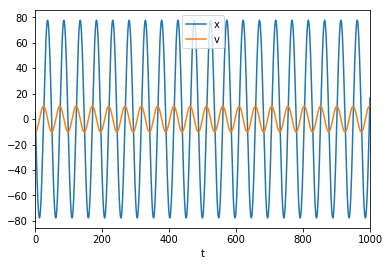

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

vL = lambda t,x,v : -(0.1*x+0.0*v)/6
xL = lambda t,x,v : v

t, x, v = 0, 5, -10
tf, dt = 1000, 0.1
sol = []

while t<tf:
  sol.append([t,x,v])
  [k1, l1] = [fg(t,x,v) for fg in [xL,vL]]
  [k2, l2] = [fg(t+dt/2, x+k1*dt/2, v+l1*dt/2) for fg in [xL,vL]]
  [k3, l3] = [fg(t+dt/2, x+k2*dt/2, v+l2*dt/2) for fg in [xL,vL]]
  [k4, l4] = [fg(t+dt, x+k3*dt, v+l3*dt) for fg in [xL,vL]]  
  t, x, v = t + dt, x + (k1+2*k2+2*k3+k4)*dt/6, v + (l1+2*l2+2*l3+l4)*dt/6
sol = pd.DataFrame(data = sol, columns = ['t','x','v'])

graf = sol.plot(x='t',y=['x','v'])

### Periodo de Oscilação de Um Sistema Massa-Mola 

Nosso objetivo é determinar como o periodo de oscilação do sistema se altera a medida que a massa do objeto aumenta. Para tanto vamos determinar os instantes em que o sistema cruza dois picos quaisquer e calcular a diferença entre os picos consecutivos. Ao final definimos o periodo como a média desta sequência de valores.



Para determinar os instantes em que a função atingiu um ponto extremo (máximo ou mínimo) levamos em consideração que neste ponto a primeira derivada da função irá trocar de sinal (em termos algébricos dizemos que $x'(t+\Delta h)*x'(t) < 0$). 

A resolução deste problema, para um sistema com os mesmos parâmetros do exemplo anterior e distintos valores de $m$ pode ser vista a seguir:

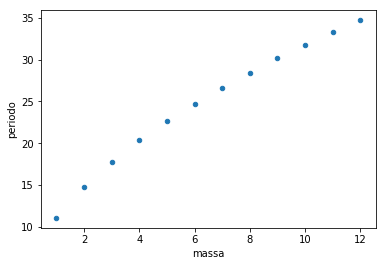

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

m = 6
vL = lambda t,x,v : -(0.1*x+0.28*v)/m
xL = lambda t,x,v : v

t, x, v, dt, tf = 0, 5, -10, 0.1, 100

def sedol(t,x,v,dt,tf):
  sol = [[t,x,v]]
  while t<tf:
    [k1, l1] = [fg(t,x,v) for fg in [xL,vL]]
    [k2, l2] = [fg(t+dt/2, x+k1*dt/2, v+l1*dt/2) for fg in [xL,vL]]
    [k3, l3] = [fg(t+dt/2, x+k2*dt/2, v+l2*dt/2) for fg in [xL,vL]]
    [k4, l4] = [fg(t+dt, x+k3*dt, v+l3*dt) for fg in [xL,vL]]  
    t, x, v = t + dt, x + (k1+2*k2+2*k3+k4)*dt/6, v + (l1+2*l2+2*l3+l4)*dt/6
    sol.append([t,x,v])
  sol = pd.DataFrame(data = sol, columns = ['t','x','v'])
  return(sol)

periodos = []
for m in np.linspace(1,12,12):
  ft_runge = sedol(t, x, v, dt, tf)
  ft_runge = ft_runge[ft_runge['v'] * ft_runge['v'].shift(1) < 0] 
  periodo = (ft_runge.t - ft_runge.t.shift(1)).mean() 
  periodos.append([m,periodo])

periodos = pd.DataFrame(data=periodos, columns=['massa','periodo'])
graf = periodos.plot(x='massa', y='periodo', kind='scatter')

### Sistema com dois corpos



Vamos agora aumentar a complexidade do problema. Teremos não mais um corpo oscilando ao redor do seu ponto de equilíbrio, mas sim dois corpos conectados por uma mola entre si, podendo andar livremente por um plano, com atrito.
Nesta condição teremos o seguinte conjunto de equações definindo o problema :

$$m_1.x''_1=(x_2-x_1)K-x'_1.\mu_1 $$
$$ $$
$$m_2.x''_2=F-(x_2-x_1)K-x'_2.\mu_2$$

Fazendo $v_1=x'_1$ e $v_2=x'_2$ teremos

$$v'_1=(x_2-x_1)\frac{K}{m_1}-\frac{(v_1\mu_1)}{m_1}$$
$$v'_2=\frac{F}{m_2}-(x_2-x_1)\frac{K}{m_2}-\frac{(v_2\mu_2)}{m_2}$$

Adotando:
- $m_1=10kg$
- $m_2=5kg$
- $k=0,1$
- $u_1=u_2=0,15$
- $x_1(0)=x_2(0)=0$
- $v_1(0)=0$
- $v_2(0)=-3m/s$
- $F$ um pulso de $1N$ de $t=20$ segundos a $t=50$ segundos, 

teremos a evolução temporal para os respectivos centros de massa dos corpos $x_1$ e $x_2$, mostrada a seguir:



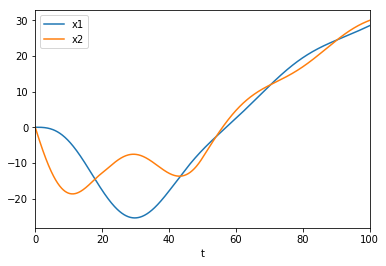

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

m1, m2, k, u1, u2 = 10, 5, 0.1, 0.15, 0.15
x1, x2, v1, v2 = 0, 0, 0, -3

x1L = lambda t, x1, v1, x2, v2, F : v1
v1L = lambda t, x1, v1, x2, v2, F : (x2-x1)*k/m1 - v1*u1/m1
x2L = lambda t, x1, v1, x2, v2, F : v2
v2L = lambda t, x1, v1, x2, v2, F : F/m2 -(x2-x1)*k/m2 -v2*u2/m2

def sedol(t, x1, v1, x2, v2, dt, tf):
  sol = [[t,x1,v1,x2,v2]]

  while t<tf:
    if (t>=20) and (t<=50):
      F = 1
    else:
      F = 0 

    [a1, b1, c1, d1] = [fg(t,x1,v1,x2,v2,F) for fg in [x1L,v1L,x2L,v2L]]

    [a2, b2, c2, d2] = [fg(t+dt/2, x1+a1*dt/2, v1+b1*dt/2, x2+c1*dt/2, v2+d1*dt/2, F) for fg in [x1L,v1L,x2L,v2L]]

    [a3, b3, c3, d3] = [fg(t+dt/2, x1+a2*dt/2, v1+b2*dt/2, x2+c2*dt/2, v2+d2*dt/2, F) for fg in [x1L,v1L,x2L,v2L]]

    [a4, b4, c4, d4] = [fg(t+dt, x1+a3*dt, v1+b3*dt, x2+c3*dt, v2+d3*dt, F) for fg in [x1L,v1L,x2L,v2L]]  

    t, x1, v1, x2, v2 = t + dt, x1 + (a1+2*a2+2*a3+a4)*dt/6, v1 + (b1+2*b2+2*b3+b4)*dt/6, x2 + (c1+2*c2+2*c3+c4)*dt/6, v2 + (d1+2*d2+2*d3+d4)*dt/6
   
    sol.append([t,x1,v1,x2,v2])

  sol = pd.DataFrame(data = sol, columns = ['t','x1','v1','x2','v2'])

  return(sol)

ft = sedol(0, x1, v1, x2, v2, 0.1, 100)
graf = ft.plot(x='t', y=['x1','x2'])

### Sistema com três corpos



Vamos agora resolver um sistema com três variáveis, através do método de Runge-Kutta de 4a ordem implementado com operações matriciais, para diminuir a complexidade das expressões. A base do raciocínio é que do ponto de vista matricial as três expressões podem ser combinadas em uma única operação matricial, $\vec{\textbf{X}}'=\textbf{A}.\vec{\textbf{X}}$. O sistema é mostrado a seguir:

$$
\begin{split}
x'_{1} &= -0,1\,x_{1}-1\,x_{2}-0,4\,x_{3} \\
x'_{2} &= 0,003\,x_{1}-0,4\,x_{2}+2\,x_{3} \\
x'_{3} &= 0,2\,x_{1}-0,02\,x_{2}-1\,x_{3} \\
x_{1}(0) &=1; x_{2}(0)=2; x_{3}(0)=3
\end{split}
$$

- Implementação da operação matricial $\vec{\textbf{X}}'=\textbf{A}.\vec{\textbf{X}}$ 

O método de Runge-Kutta 4a ordem requer em seguida a implementação do seguinte conjunto de operações, para cada uma das variáveis :

$$
\begin{split}
k1 &= f\left[t;x_1;x_2;x_3\right] \\
k2 &= f\left[t+\frac{h}{2} ; x_1+k_1\,\frac{h}{2} ; x_2+l_1\,\frac{h}{2} ; x_3+m_1\,\frac{h}{2} \right] \\
k3 &= f\left[t+\frac{h}{2} ; x_1+k_2\,\frac{h}{2} ; x_2+l_2\,\frac{h}{2} ; x_3+m_2\,\frac{h}{2} \right] \\
k4 &= f\left[t ; x_1+k_3\,h ; x_2+l_3\,h ; x_3+m_3\,h\right] \\
x_1(t+h) &= x_1(t) + \frac{1}{6}\,(k_1 + 2\,k_2 + 2\,k_3 + k_4)
\end{split}
$$

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

h = np.array([0.1]).reshape(1,1)

C = np.array([[-0.100, -1.00,  -0.4],
              [ 0.003, -0.40,   2.0],
              [ 0.200, -0.02,  -1.0]])

t0 = np.zeros(1).reshape(1,1)
x0 = np.array([1,0,3]).reshape(3,1)
sol = np.concatenate((t0,x0),axis=0) 

for i in range(300):
  k1 = C.dot(x0)
  k2 = C.dot(x0 + k1*h/2)
  k3 = C.dot(x0 + k2*h/2)
  k4 = C.dot(x0 + k3*h)

  t0 = t0 + h
  x0 = x0 + h/6*(k1+2*k2+2*k3+k4)
  sol0 = np.concatenate((t0,x0),axis=0)
  sol = np.concatenate((sol,sol0),axis=1)

sol = sol.T
df = pd.DataFrame(data = sol, columns = ['t','x1','x2','x3'])
df.head()

,t,x1,x2,x3
0,0.0,1.000000,0.000000,3.000000
1,0.1,0.847456,0.561572,2.731584
2,0.2,0.654477,1.050592,2.484408
3,0.3,0.427552,1.473795,2.255876
4,0.4,0.172564,1.837181,2.043746


Por último são mostrados os gráficos da evolução temporal das variáveis e o diagrama de fases (variáveis dependentes entre si).

- Evolução temporal das variáveis $x_1$, $x_2$ e $x_3$

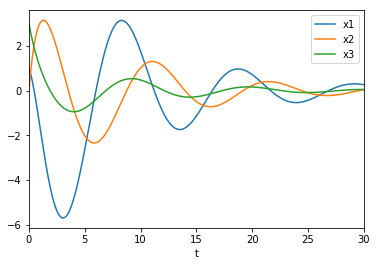

In [0]:
df.plot(x='t', y=['x1','x2','x3'])
plt.show()

- Diagrama de fases das variáveis

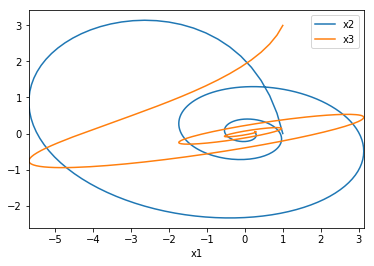

In [0]:
df.plot(x='x1', y=['x2','x3'])
plt.show()

### Desenho da família de soluções de $y'=\sqrt{|y^{2}-1|}$

Neste caso desejamos desenhar diversos gráficos de $y(t)$, para diferentes condições iniciais $y_0 = y(0)$. 

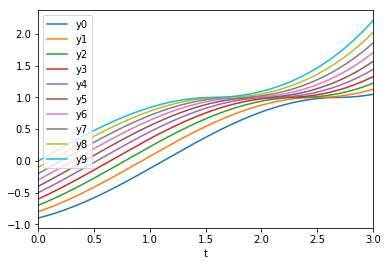

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def fL(t,y):
  result = np.sqrt(np.abs(y**2-1))
  return(result)

def runge4(t,y0,dt):
  k1 = fL(t,y0)
  k2 = fL(t+dt/2, y0 + k1*dt/2)
  k3 = fL(t+dt/2, y0 + k2*dt/2)
  k4 = fL(t+dt, y0 + k3*dt)
  y1 = y0 + dt/6*(k1+2*k2+2*k3+k4)
  return(y1)

ti = 0; tf = 3; n = 1000
ts = np.linspace(ti, tf, n); dt = ts[1] - ts[0]
y0s = np.linspace(-0.9,0,10)

sols = np.concatenate(([ti],y0s)).reshape(1,-1)

for t0 in ts:
  y1s = [ runge4(t0,y0,dt) for y0 in sols[-1,1:]]
  t1 = t0+dt
  sol1 = np.concatenate(([t1],y1s)).reshape(1,-1)
  sols = np.append(sols,sol1,axis=0)

nomes = list('t')
for i in range(len(y0s)):
  nome = 'y' + str(i)
  nomes.append(nome)

df = pd.DataFrame(data=sols, columns=nomes)
df.plot(x = 't', y = df.columns[1:])
plt.show()

In [0]:
df.head()

,t,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,0.000000,-0.900000,-0.800000,-0.700000,-0.600000,-0.500000,-0.400000,-0.300000,-0.200000,-0.100000,0.000000
1,0.003003,-0.898687,-0.798195,-0.697852,-0.597595,-0.497397,-0.397246,-0.297134,-0.197057,-0.097012,0.003003
2,0.006006,-0.897366,-0.796382,-0.695698,-0.595184,-0.494790,-0.394488,-0.294265,-0.194112,-0.094022,0.006006
3,0.009009,-0.896037,-0.794562,-0.693538,-0.592769,-0.492178,-0.391727,-0.291394,-0.191165,-0.091032,0.009009
4,0.012012,-0.894699,-0.792735,-0.691371,-0.590347,-0.489561,-0.388962,-0.288520,-0.188217,-0.088041,0.012012



## Método das Diferenças Finitas

Este método parte do seguinte raciocínio : a derivada tanto pode ser calculada pela definição, isto é 


$$\frac{f(t+h)-f(t)}{h}$$ quanto pela média da sua própria expressão, isto é 


$$\frac{f'(t+h)+f'(t)}{2}$$


Igualando os termos teremos :


$$
\frac{f(t+h)-f(t)}{h} = \frac{f'(t+h)+f'(t)}{2}
$$


Isolando $f(t+h)$ teremos :

$$
f(t+h) = \frac{h}{2}\,\left[f'(t+h)+f'(t)\right]+f(t)
$$


Como o valor de $f'(t+h)$ para ser calculado depende do valor de $f(t+h)$ temos um processo iterativo que converge linha a linha para o valor correto.

Compare a resolução pelo método de Euler, Runge-Kutta 4a Ordem e Diferenças Finitas, com $h=0,5$ para a solução da equação que representa o balanço de massa em um reator, a saber :

$$
V\,\frac{dc}{dt}=F-Q\,c-k\,V\,c^{2}
$$

onde $V=12 m^{3}$ é o volume do reator, $c$ é a concentração a ser determinada ao longo do tempo, $F=175g/min$ é a taxa de alimentação, $Q=1m^{3}/min$ é a vazão e $k=0,15m^{3}/g/min$ é a taxa de reação que ``consome'' o produto. Deseja-se resolver a equação até que a concentração $c$ do produto químico no interior do reator fique estável, partindo de diferentes valores para a concentração inicial $c(0)$, a qual deve ir de $0$ até $4$. Analise também o caso (hipotético) de uma concentração inicial negativa comparando a solução obtida por cada um dos três métodos.

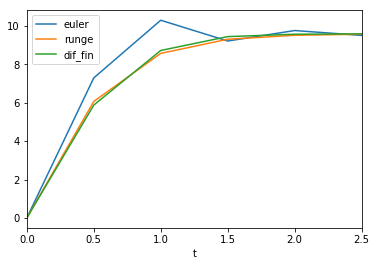

In [0]:
import numpy as np
import pandas as pd

def cL(c):
  V = 12; F = 175; Q = 1; k = 0.15
  resultado = (F - Q*c - k*V*(c**2))/V
  return(resultado)

def euler(c0,dt):
  c1 = c0 + cL(c0)*dt
  return(c1)

def runge4(c0,dt):
  k1 = cL(c0)
  k2 = cL(c0 + k1*dt/2)
  k3 = cL(c0 + k2*dt/2)
  k4 = cL(c0 + k3*dt)
  c1 = c0 + dt/6*(k1+2*k2+2*k3+k4)
  return(c1)

def diffin(c0,dt):
  # f(t+h) = h/2 * [ fL(t+h) + fL(t) ] + f(t)
  cL0 = cL(c0)
  c1 = c0 + cL0*dt
  i = 0; n_iter_max = 100; 
  dif_perc = 1; dif_perc_max = 1e-6
  while ((i<n_iter_max) and (dif_perc > dif_perc_max)):
    cL1 = cL(c1)
    c1_new = dt/2 * ( cL1 + cL0 ) + c0
    dif_perc = abs(c1_new - c1)/c1_new
    c1 = c1_new
  return(c1)

ti = 0; tf = 2; n = 5;
ts = np.linspace(ti, tf, n); dt = ts[1] - ts[0]

c0 = 0
sols = np.array([ti, c0, c0, c0]).reshape(1,-1)
for t in ts:
  c0_euler = sols[-1,1]; c1_euler = euler(c0_euler, dt)
  c0_runge = sols[-1,2]; c1_runge = runge4(c0_runge, dt)
  c0_diffin = sols[-1,3]; c1_diffin = diffin(c0_diffin, dt)
  sols0 = np.array([t+dt, c1_euler, c1_runge, c1_diffin]).reshape(1,-1)
  sols = np.concatenate((sols, sols0), axis=0)

df = pd.DataFrame(data=sols, columns=['t','euler','runge','dif_fin'])
graf = df.plot(x='t', y=['euler','runge','dif_fin'])

Além disso as figuras a seguir mostram os gráficos da evolução temporal de $c(t)$ obtidos com os três métodos para os casos iniciais $c(0)=0$ e $c(0)=-8$, lembrando sempre que esta última situação (onde a concentração inicial é negativa) é puramente teórica. Como pode-se ver, existe uma grande concordância entre o resultado prático obtido pela aplicação do método de Runge-Kutta de 4a ordem e o método das diferenças finitas.

Comparativo de soluções para $c(0)=0$. Para este exemplo vamos criar uma função que irá gerar o dataframe com a família de soluções.

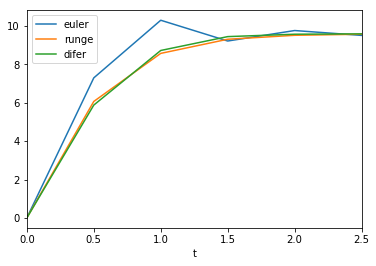

In [0]:
import numpy as np
import pandas as pd

def cL(c0):
  V = 12; F = 175; Q = 1; k = 0.15
  resultado = (F - Q*c0 - k*V*(c0**2))/V
  return(resultado)

def euler(c0, dt):
  c1 = c0 + cL(c0)*dt
  return(c1)

def runge(c0, dt):
  k1 = cL(c0)
  k2 = cL(c0 + k1*dt/2)
  k3 = cL(c0 + k2*dt/2)
  k4 = cL(c0 + k3*dt)
  c1 = c0 + dt/6*(k1+2*k2+2*k3+k4)
  return(c1)

def difin(c0,dt):
  dif_max = 1e-6
  cL0 = cL(c0)
  c1 = c0 + cL0 * dt

  for i in range(100):
    cL1 = cL(c1)
    c1_new = c0 + (cL1 + cL0)/2 * dt
    dif_per = abs((c1_new - c1)/c1_new)
    c1 = c1_new
    if dif_per < dif_max:
      break
  return(c1)

def familia(c0, ti, tf, n):
  ts = np.linspace(ti, tf, n); dt = ts[1] - ts[0]
  sols = np.array([ti, c0, c0, c0]).reshape(1,-1)
  for t in ts:
    t1 = sols[-1,0] + dt
    c0_euler = sols[-1,1]; c1_euler = euler(c0_euler,dt)
    c0_runge = sols[-1,2]; c1_runge = runge(c0_runge,dt)
    c0_difin = sols[-1,3]; c1_difin = difin(c0_difin,dt)
    sol0 = np.array([t1, c1_euler, c1_runge, c1_difin]).reshape(1,-1)
    sols = np.concatenate((sols, sol0), axis=0)
  df = pd.DataFrame(data = sols, columns = ['t','euler','runge','difer'])
  return(df)

c0 = 0
ti = 0; tf = 2; n = 5
df = familia(c0, ti, tf, n)
graf = df.plot(x = 't', y = ['euler','runge','difer'])

Comparativo de soluções para $c(0)=-8$

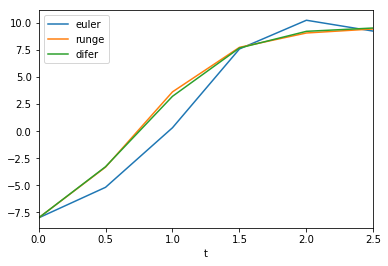

In [0]:
c0 = -8
ti = 0; tf = 2; n = 5
df = familia(c0, ti, tf, n)
df.plot(x = 't', y = ['euler','runge','difer'])
plt.show()

Resolver a equação diferencial $mx'' + u.x' = F(t)$ para $m=2$, $u=0,2$ e passo de integração $h=0,5$ no intervalo $t=[0;50]$ pelo método de Euler, de Runge-Kutta 4a ordem e das Diferenças Finitas. Considere que a força $F(t)$ atua de acordo com a seguinte regra de formação :

$$ F(t) = \begin{array}{rc}
0,5 &\mbox{se}\quad 0 \leq t < 4\\
1-\frac{t}{8} &\mbox{se}\quad 4 \leq t < 8\\
0 &\mbox{se}\quad 8 \leq t
\end{array} $$

**SOLUÇÃO** Primeiro é feita uma transformação na equação de forma a torna-la um sistema de equações diferenciais lineares de $1^{a}$ ordem. 

$$mx'' + u.x' = F(x)$$ 
$$ $$
$$x''m = F(t) - u.x'$$
$$ $$
$$x'' = \frac{F(t) - u.x'}{m}$$

O sistema então torna-se:

$$z' = \frac{F(t) - u.z}{m}$$
$$x' = z$$

Em seguida o sistema com duas equações é resolvido abaixo.

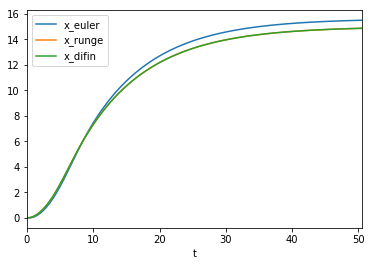

In [0]:
import numpy as np
import pandas as pd
u = 0.2; m = 2

def F(t):
  if (0<=t) and (t<4):
    return(0.5)
  elif (4<=t) and (t<8):
    return(1-t/8)
  else:
    return(0)

def xL(x,z,t):
  return(z)

def zL(x,z,t):
  return((F(t)-u*z)/m)

def euler(x0,z0,t0,dt):
  x1 = x0 + xL(x0,z0,t0)*dt
  z1 = z0 + zL(x0,z0,t0)*dt
  return(x1,z1)

def runge(x0,z0,t0,dt):
  k1 = xL(x0,z0,t0)
  l1 = zL(x0,z0,t0)

  k2 = xL(x0+k1*dt/2, z0+l1*dt/2, t0+dt/2)
  l2 = zL(x0+k1*dt/2, z0+l1*dt/2, t0+dt/2)

  k3 = xL(x0+k2*dt/2, z0+l2*dt/2, t0+dt/2)
  l3 = zL(x0+k2*dt/2, z0+l2*dt/2, t0+dt/2)

  k4 = xL(x0+k3*dt, z0+l3*dt, t0+dt)
  l4 = zL(x0+k3*dt, z0+l3*dt, t0+dt)

  x1 = x0 + dt/6*(k1+2*k2+2*k3+k4)
  z1 = z0 + dt/6*(l1+2*l2+2*l3+l4)
  return(x1,z1)

def difin(x0,z0,t0,dt):
  xL0 = xL(x0,z0,t0)
  zL0 = zL(x0,z0,t0)

  x1 = x0 + xL0*dt
  z1 = z0 + zL0*dt
  t1 = t0 + dt

  for i in range(100):
    xL1 = xL(x1,z1,t1)
    zL1 = zL(x1,z1,t1)

    xL1 = (xL1 + xL0)/2
    zL1 = (zL1 + zL0)/2

    x1 = x0 + xL1*dt
    z1 = z0 + zL1*dt

  return(x1,z1)

def familia(ti, tf, n, x0, z0):
  ts = np.linspace(ti,tf,n)
  sol = np.array([0,x0,z0,x0,z0,x0,z0]).reshape(1,-1)
  
  for t0 in ts:
    t0 = sol[-1,0]
    t1 = t0 + dt

    x0 = sol[-1,1]; z0 = sol[-1,2]
    x1_euler, z1_euler = euler(x0,z0,t0,dt)

    x0 = sol[-1,3]; z0 = sol[-1,4]
    x1_runge, z1_runge = runge(x0,z0,t0,dt)

    x0 = sol[-1,5]; z0 = sol[-1,6]
    x1_difin, z1_difin = difin(x0,z0,t0,dt)

    sol0 = np.array([t1,x1_euler,z1_euler,x1_runge,z1_runge,x1_difin,z1_difin]).reshape(1,-1)
    sol = np.concatenate((sol,sol0),axis=0)

  df = pd.DataFrame(data = sol, 
                    columns = ['t','x_euler','z_euler','x_runge','z_runge','x_difin','z_difin'])
  return(df)

dt = 0.5; ti = 0; tf = 50; x0 = 0; z0 = 0
n = int((tf - ti) / dt + 1)

df = familia(ti, tf, n, x0, z0)
graf = df.plot(x='t', y=['x_euler','x_runge','x_difin'])

Resolver a equação diferencial não linear do pêndulo $\theta''(t) = -\frac{g}{l}sin(\theta)$ para $\theta(0)=10^{o}$ e $\theta'(0)=0$ pelos métodos de Euler, Runge-Kutta 4a ordem e Diferenças Finitas. Comparar os resultados obtidos com a solução analítica da equação linearizada $\theta''(t) = -\frac{g}{l}\theta$ a qual é válida para pequenos valores de $\theta$. Considerar $g=9,8m/s^{2}$ e $l=2m$.

**SOLUÇÃO** Vamos reutilizar a maior parte do código anterior. Apenas precisamos alterar as definições de x e z. No gráfico abaixo é mostrada a resolução pelos três métodos. No caso do método de Euler, Como pode ser visto pelo gráfico, mesmo com um passo de apenas $0,005$ dois ciclos são suficientes para provocar o aparecimento de uma divergência. Os erros neste caso são provocados por um acúmulo de erros de arredondamento (devido ao montante de cálculos) e de truncamento (devido ao método em sí).

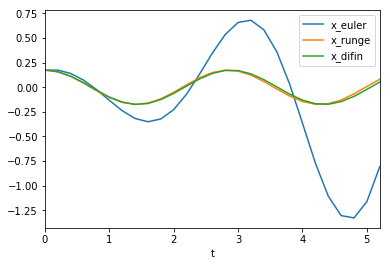

In [0]:
import numpy as np
import pandas as pd
g = 9.8; L = 2

#Theta será x
def xL(x,z,t):
  return(z)

#Theta' será z
def zL(x,z,t):
  return(-g/L*np.sin(x))

x0_graus = 10; x0 = x0_graus * np.pi / 180
z0_graus_s = 0;  z0 = z0_graus_s * np.pi / 180

dt = 0.2; ti = 0; tf = 5
n = int((tf - ti) / dt + 1)

df = familia(ti, tf, n, x0, z0)
graf = df.plot(x='t', y=['x_euler','x_runge','x_difin'])

Resolver o sistema de equações diferenciais não linear :

$$x' = 1,2x - 0,6xy$$
$$ $$
$$y' = -0,8y + 0,3xy$$
$$ $$
$$x(0)=2;y(0)=1$$

também conhecido por Modelo Predador-Presa, pois pode ser usado para descrever o equilíbrio ecológico entre uma espécie de predador (Y) e uma população de presas (X). Faça além do gráfico da evolução temporal de X e de Y, o gráfico de fase X-Y. Resolva o sistema pelo método de Runge-Kutta de 4a ordem


**SOLUÇÃO** O modelo descreve uma população de presas X a qual tem uma taxa de crescimento associada (no caso 1,2) e uma taxa de mortalidade decorrente dos encontros predador-presa (no caso 0,6), descritos pelo fator $x.y$ na primeira equação. A população de predadores por sua vez, tende a diminuir com seu próprio aumento populacional (por causa da competição entre os próprios predadores, fator -0,8 na segunda equação) e a crescer devido aos encontros predador-presa, também descrito na segunda equação pelo fator $x.y$ e pelo fator 0,3.

A solução é apresentada nos gráficos a seguir. No primeiro gráfico é apresentada a evolução temporal apenas da solução obtida através do método de runge kutta. Perceba a nítida oscilação de populações a medida que as quantidades relativas de predadores e presa variam ao longo do tempo. Na figura seguinte é apresentado o diagrama de fase para a solução via runge kutta (linha contínua) e pelo método de Euler (linha tracejada). Observe que o acúmulo de erros provocado pelo método de Euler faz com que o gráfico não ``feche'', gerando oscilações crescentes.

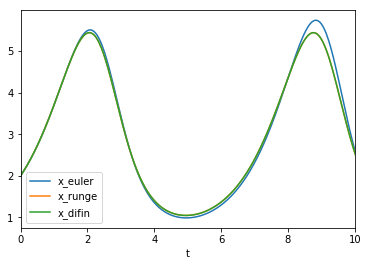

In [0]:
import numpy as np
import pandas as pd

#Theta será x
def xL(x,z,t):
  return(1.2*x-0.6*x*z)

#Theta' será z
def zL(x,z,t):
  return(-0.8*z+0.3*x*z)

x0=2; z0=1

dt = 0.02; ti = 0; tf = 10
n = int((tf - ti) / dt + 1)

df = familia(ti, tf, n, x0, z0)
graf = df.plot(x='t', y=['x_euler','x_runge','x_difin'])

Gráfico de fase das variáveis dependentes, $x$ e $y$, Modelo Predador-Presa, resoluções pelo Método de Euler, linha tracejada e por runge kutta 4a ordem, linha contínua

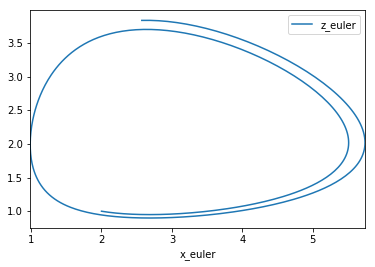

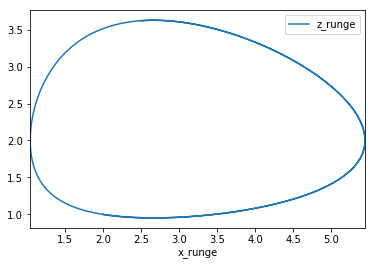

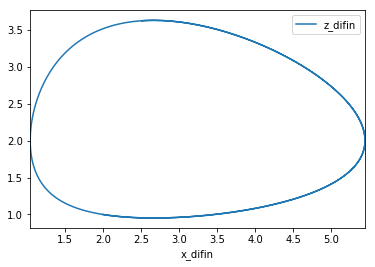

In [0]:
graf1 = df.plot(x='x_euler', y='z_euler')
graf2 = df.plot(x='x_runge', y='z_runge')
graf3 = df.plot(x='x_difin', y='z_difin')

O sistema de equações apresentado a seguir é conhecido pelo nome de Sistema de Equações de Van der Walls e suas equações são classificados como rígidas. Resolva o mesmo para $t=[0;100]$.

$$y_1' = y_2$$
$$ $$
$$y_2' = u(1-y_1^2)y_2-y_1$$
$$ $$
$$y_1(0)=y_2(0)=1$$


**SOLUÇÃO** As características intrínsecas destas equações tornam elas de difícil solução numérica, requerendo um método especial chamado de *Piecewise-Integration*. Abaixo é apresentado o gráfico da evolução temporal da variável $y_1$, equações de Van de Walls. O leitor pode tentar resolver este sistema pelo método de Runge-Kutta 4a ordem e verificar que o mesmo falha totalmente. Isto ocorre porque sendo a inclinação da função quase vertical, isto provoca erro no sistema de aproximações da inclinação da função solução ao utilizarmos o método de runge kutta.

In [0]:
#IMPLEMENTAR OS CALCULOS EM PYTHON
import numpy as np


## Comparação entre os Métodos de Resolução




Nesta seção iremos comparar a eficiência dos métodos numéricos, aplicando os mesmos a resolução a longo prazo em um sistema cuja saída apresentará uma função oscilante. Esta combinação irá levar ao extremo a capacidade de resolução e a precisão dos métodos, pois além de buscarmos uma solução para um longo período de tempo, ela irá oscilar, o que fará com que a derivada assuma valores positivos e negativos.

Calcular a corrente $i(t)$ para um circuito RLC série, com tensão de entrada $E(t)=E_0\,\sin{\omega\,t}$ para um período de tempo $t$ de $0$ a $100$ segundos. O passo de integração será $h=0,1$ segundos. Deseja-se comparar a solução exata com as soluções obtidas com os métodos de : Euler, Diferenças Finitas e Runge Kutta 4a ordem

Resolução Teórica

Aplicando a Lei de Kirchoff das malhas no circuito RLC série, teremos :

$$
L\,\frac{di}{dt} + R\,i + \frac{q}{C} - E(t) = 0
$$

Isolando $E(t)$ :

$$
L\,\frac{di}{dt} + R\,i + \frac{q}{C} = E(t)
$$

Trocando a notação de derivada :

$$
L.i' + R.i + q/C = E(t)
$$

Isolando $L\,i'$ :

$$
L.i' = -R.i - q/C + E(t)
$$

Passando L para o outro lado dividindo :

$$
i' = -\frac{R}{L}\,i -\frac{1}{C\,L}\,q + \frac{E(t)}{L}
$$
	
Sistema de EDOs de $1^a$ ordem em $i'$ e $q'$ :

$$
\begin{split}
i' &= -\frac{R}{L}\,i -\frac{1}{C\,L}\,q + \frac{E(t)}{L} \\	
q' &= i	
\end{split}
$$

Supondo $E(t)=E_0\,\sin{\omega\,t}$ e passando para a forma matricial teremos :

$$
 \begin{bmatrix}
  i' \\
  q'
 \end{bmatrix}
 =
 \begin{bmatrix}
  -\frac{R}{L} & -\frac{1}{C\,L} \\
  1 & 0
 \end{bmatrix}
 .
 \begin{bmatrix}
  i \\
  q
 \end{bmatrix}
 +
 \begin{bmatrix}
 \frac{1}{L} \\
 0
 \end{bmatrix}
 E(t)
$$

Resolvendo de maneira literal para a variável $q$, com $R=0\,\Omega$, $L=1\,H$, $C=0,25\,F$, $E_0=1\,V$ e $\omega=\sqrt{3,5}$ teremos (a resolução não é apresentada neste texto):

$$
q = -\frac{k\,\omega}{p}\,\sin{p\,t}+k\,\sin{\omega\,t}
$$

onde

$$
p = \frac{1}{\sqrt{L\,C}}
$$

e

$$
k = \frac{E_0}{L\,(p^2-\omega^2)}
$$




### Código para resolução

A seguir é apresentado o código para resolução numérica e cálculo dos valores da solução exata. A maior parte do código (embutido na função *familia*) é reutilizada.

In [0]:
import numpy as np
import pandas as pd

R = 0; L=1; C=0.25; E0=1; w = np.sqrt(3.5)
p = 1/np.sqrt(L*C); k = E0/(L*(p**2 - w**2))

def x_exata(t):
  return(-k*w/p*np.sin(p*t)+k*np.sin(w*t))

#q será x; xL = q'
def xL(x,z,t):
  return(z)

#i será z, pois i = q'
def zL(x,z,t):
  E = E0 * np.sin(w*t)
  iLinha = -R/L*z-1/(C*L)*x+E/L
  return(iLinha)

x0=0; z0=0

dt = 0.02; ti = 0; tf = 400
n = int((tf - ti) / dt + 1)

df = familia(ti, tf, n, x0, z0)
df['x_exata'] = [x_exata(t) for t in df['t']]


### Método de Euler



A figura a seguir mostra o gráfico comparando a solução exata com a solução obtida pelo método de Euler. Como pode ser visto, o acúmulo de erros faz com que a solução numérica divirja da solução exata já no primeiro ciclo de oscilação rápida, tornando o método pouco útil para a análise da solução após 5 segundos.


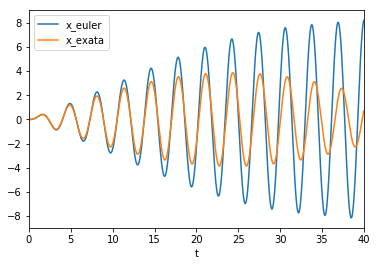

In [0]:
t_fim = 40
graf = df[df['t']<t_fim].plot(x='t', y=['x_euler','x_exata'])

### Métodos de Runge Kutta e de Diferenças Finitas



Aqui é apresentado o gráfico comparando a solução exata com a solução numérica via runge kutta 4a ordem e diferenças finitas. Como pode ser visto, ambos os métodos proporcionam uma grande estabilidade na solução. Deve-se considerar que o método de Runge Kutta atinge precisão similar ao das diferenças finitas com um número muito menor de operações.

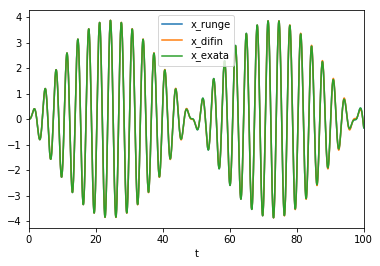

In [0]:
graf = df[df['t']<100].plot(x='t', y=['x_runge','x_difin','x_exata'])

## Exercícios

- Resolver numericamente as equações diferenciais abaixo implementando os métodos de Euler, Diferenças Finitas e Runge-Kutta de 4a ordem diretamente em planilha e comparar o resultado com as funções \textbf{ODE\_RK4} e \textbf{ODE\_SYSL} do XNumbers, desenhando o gráfico da função solução. Utilize como passo de integração $h=0,1$.

  1. $y' = y\,x^2-1,1\,y$ \\  $y(0)=1$

  2. $y'=z$ e $z'=-4\,z-3\,y$ \\  $y(0)=3$ e $z(0)=4$

  3. $y'=z$ e $z'=-4\,z-3\,y+3\,exp(-2\,t)$ \\  $y(0)=1$ e $z(0)=-1$

  4. $y'=z$ e $z'=-6\,z-9\,y+0$ \\ $y(0)=-1$ e $z(0)=1$

  5. $y'=z$ e $z'=-5\,z-6\,y+3\,exp(-2\,t)$ \\ $y(0)=1$ e $z(0)=-1$

- Desenhar a família de soluções das equações diferenciais abaixo e quando for fornecida a solução analítica exata, desenhar a família de soluções também da solução exata e comparar a diferença percentual entre o valor numérico aproximado obtido com \textbf{ODE\_RK4} e o valor exato.

  1. $y' = y-x^2\,y^2$, solução exata: $y(x) = \frac{1}{x^{2}-2\,x+2+\left(\frac{1}{y_0} -2\right)\,e^{-x}}$